<h1 align=center><font size=5>HR Analytics</font></h1>

Mengimport library yang diperlukan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

Import dataset

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Dimensi dari dataset (baris,kolom)

In [4]:
df.shape

(14999, 10)

Melihat nama nama kolom dari dataset

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Mengecek apakah ada missing value (NaN) dalam dataset

In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Melihat kesimpulan statistik ringkas dari setiap feature dalam dataset

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Melihat jumlah karyawan yang bertahan dan pindah dari dataset

C:\Users\LENOVO\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

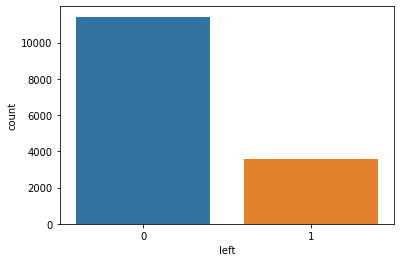

In [8]:
sns.countplot(df['left']) # 0 means no and 1 means yes

Pada tabel diatas dapat dilihat nilai 0 dan 1, 0 berarti karyawan tersebut bertahan dan 1 berarti karyawan tersebut pindah

Untuk memudahkan, kita mengganti nilai 0 menjadi "No" dan nilai 1 menjadi "Yes"

In [9]:
df['left'].replace({1 : 'Yes', 0 : 'No'}, inplace = True)

C:\Users\LENOVO\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

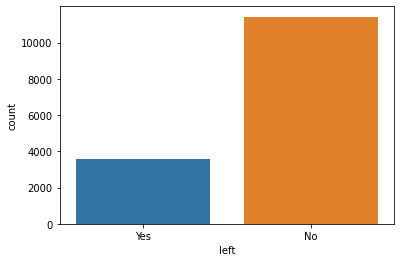

In [10]:
sns.countplot(df['left']) # 0 means no and 1 means yes

Melihat korelasi/hubungan antar feature yang bertipe numerik dalam dataset

<AxesSubplot:>

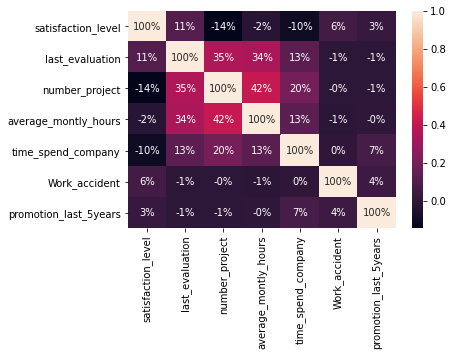

In [11]:
sns.heatmap(df.corr(),annot=True,fmt ='.0%')

Melihat perbandingan karyawan yang bertahan dan pindah berdasarkan status gaji nya (low, medium, high)

<AxesSubplot:xlabel='salary', ylabel='count'>

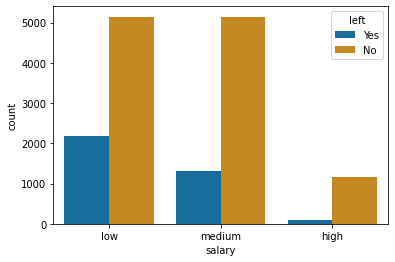

In [12]:
sns.countplot(x ='salary', hue='left', data=df, palette='colorblind')

Membentuk Model

In [13]:
from sklearn.model_selection import train_test_split

Membagi dataset menjadi training dataset dan testing dataset, dengan perbandingan nilai testing dataset sebesar 10 % dari keseluruhan dataset dan training dataset sebesar 90 % dari keseluruhan dataset

Pada pembentukan model ini, saya hanya memasukkan dua variabel/feature yakni average_montly_time da time_spend_company.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['average_montly_hours','time_spend_company']], df['left'], test_size = 0.1)

Melihat testing dataset

In [23]:
X_test.head(3)

,average_montly_hours,time_spend_company
3344,98,3
12066,153,3
11695,165,3


Import Logostic Regression model dari sklearn.linear_model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Melihat score akurasi testing dataset pada model

In [17]:
model.score(X_test,y_test)

0.7446666666666667

melihat probabilitas apakah karyawan tersebut bertahan atau tidak, pada testing data

In [22]:
model.predict_proba(X_test)

array([[0.80217912, 0.19782088],
       [0.76114262, 0.23885738],
       [0.81822431, 0.18177569],
       ...,
       [0.68110399, 0.31889601],
       [0.72087952, 0.27912048],
       [0.75496229, 0.24503771]])

Prediksi apakah suatu karyawan bertahan atau pergi, berdasarkan masukan/input dua variabel : 1. Average_montly_hours dan 2.Time_spend_company

In [23]:
model.predict([[421,2]]) # Average_montly_hours = 421 dan Time_spend_company = 2

array(['No'], dtype=object)

Pada akhirnya model ini berjalan cukup bagus, variabel/feature yang dipergunakan pada model ini dapat ditambah atau dikurangi sesuai dengan kebutuhan